### PCA dengan menggunakan scikit learn

In [34]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# pd.DataFrame(load_breast_cancer())
load_breast_cancer().keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [24]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load dataset (misalnya dataset iris)
data = load_iris()
X = data.data  # Fitur
y = data.target  # Label/Kelas


In [2]:

# 1. Normalisasi data (standarisasi)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [3]:

# 2. Terapkan PCA
# Misalnya kita ingin mengurangi dimensi ke 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [4]:
X_pca

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

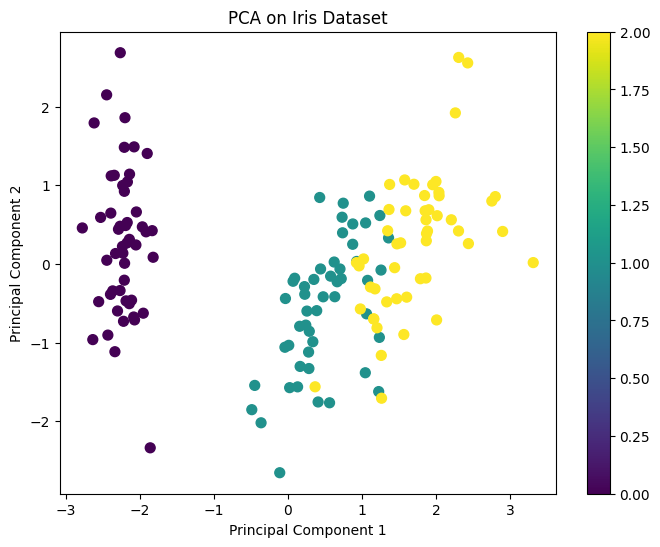

Explained variance ratio: [0.72962445 0.22850762]


In [5]:

# 3. Visualisasi hasil PCA (2D)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Iris Dataset')
plt.colorbar()
plt.show()

# 4. Menampilkan variance ratio dari principal components
print('Explained variance ratio:', pca.explained_variance_ratio_)


### PCA dari scratch

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


In [7]:

# 1. Load dataset (misalnya dataset iris)
data = load_iris()
X = data.data  # Fitur
y = data.target  # Label/Kelas


In [8]:

# 2. Normalisasi data (mengurangi mean dari setiap kolom/fitur)
X_centered = X - np.mean(X, axis=0)



In [9]:
# 3. Menghitung matriks kovarians
cov_matrix = np.cov(X_centered, rowvar=False)



In [10]:
# 4. Menghitung eigenvectors dan eigenvalues
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)



In [11]:
# 5. Urutkan eigenvectors berdasarkan eigenvalues (dari yang terbesar ke terkecil)
sorted_index = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_index]
sorted_eigenvectors = eigenvectors[:, sorted_index]



In [20]:
# 6. Pilih beberapa principal components (misalnya 2 komponen)
n_components = 2
eigenvector_subset = sorted_eigenvectors[:, 0:n_components]



In [21]:
# 7. Proyeksi data ke ruang dimensi baru
X_reduced = np.dot(X_centered, eigenvector_subset)



In [22]:
X_reduced

array([[ 2.68412563,  0.31939725],
       [ 2.71414169, -0.17700123],
       [ 2.88899057, -0.14494943],
       [ 2.74534286, -0.31829898],
       [ 2.72871654,  0.32675451],
       [ 2.28085963,  0.74133045],
       [ 2.82053775, -0.08946138],
       [ 2.62614497,  0.16338496],
       [ 2.88638273, -0.57831175],
       [ 2.6727558 , -0.11377425],
       [ 2.50694709,  0.6450689 ],
       [ 2.61275523,  0.01472994],
       [ 2.78610927, -0.235112  ],
       [ 3.22380374, -0.51139459],
       [ 2.64475039,  1.17876464],
       [ 2.38603903,  1.33806233],
       [ 2.62352788,  0.81067951],
       [ 2.64829671,  0.31184914],
       [ 2.19982032,  0.87283904],
       [ 2.5879864 ,  0.51356031],
       [ 2.31025622,  0.39134594],
       [ 2.54370523,  0.43299606],
       [ 3.21593942,  0.13346807],
       [ 2.30273318,  0.09870885],
       [ 2.35575405, -0.03728186],
       [ 2.50666891, -0.14601688],
       [ 2.46882007,  0.13095149],
       [ 2.56231991,  0.36771886],
       [ 2.63953472,

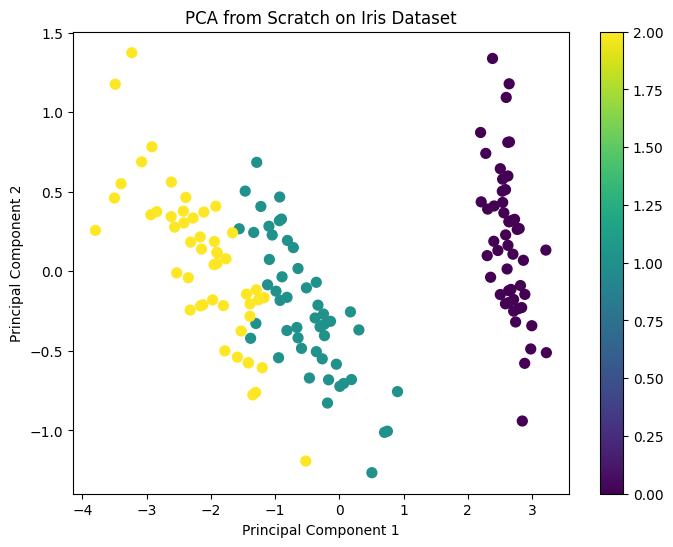

In [14]:
# 8. Visualisasi hasil PCA (2D)
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA from Scratch on Iris Dataset')
plt.colorbar()
plt.show()



In [15]:
# 9. Menampilkan eigenvalues untuk mengetahui varians yang dijelaskan oleh tiap komponen
print("Eigenvalues:", sorted_eigenvalues)


Eigenvalues: [4.22824171 0.24267075 0.0782095  0.02383509]
